<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**

A neuron takes inputs and fires an output if the weighted sum of the input meets the activation threshold

- **Input Layer:**

Input layer is the layer of a neural network that directly interfaces the input to the network.

- **Hidden Layer:**

Hidden layers are the layers of a neural network that neither the input or output have direct access to.

- **Output Layer:**

Output layer is the layer of a neural network that directly interfaces with the outputs of the network.

- **Activation:**

Activation is the function of a perceptron that takes a weighted inputs of a perceptron and determines what should be the output. Common activation functions includes sigmoid, tanh, ReLU, leakyReLU, etc.

- **Backpropagation:**

Back propogation is one of the algorithm that people use to update the weights/parameters of neural networks. First, inputs is processed through a forward step and produce an output. That output is differenced against the expected target output. The differences is then back propogated to find attributions from weights and biases parameters. Update the parameters and go through the steps until it converges to a solution.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
np.random.seed(45)

c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,

## 2. Perceptron on XOR Gates <a id="Q3=2"></a>

Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2|x3|	y|
|---|---|---|---|
1|	1|	1|	1|
1|	0|	1|	0|
0|	1|	1|	0|
0|	0|	1|	0|

In [2]:
x1 = np.array([1, 1, 0, 0])
x2 = np.array([1, 0, 1, 0])
x3 = np.array([1, 1, 1, 1])
y = np.array([[1], [0], [0], [0]])
X = np.vstack([x1, x2, x3]).T
print(X.shape, y.shape)

(4, 3) (4, 1)


In [3]:
class Perceptron():
    def __init__(self, input_dim = 3, output_dim = 1, lr=0.1, iterations=1000):
        self.lr = lr
        self.iterations = iterations

        # initiailize weights
        self.w = np.random.randn(input_dim, output_dim) 
        self.b = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T)
        dw = x.reshape(-1, 1).dot(dout.reshape(-1, 1))
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        for i in range(self.iterations):            
            for j in range(x.shape[0]):
                # forward prop
                scores, cache = self.affine_forward(x[j], self.w, self.b)
                
                # scoring
                out = self.sigmoid(scores)
                loss = y[j] - out.reshape(-1,)
                self.loss.append(np.mean(loss**2))
                
                # back prop
                dout = loss * self.dsigmoid(out)
                _, dw, db = self.affine_backward(dout.reshape(-1,), cache)
        
                # gradient update
                self.w += dw
                self.b += db
        pass
        
    def predict(self, x):
        return self.sigmoid(self.affine_forward(x, self.w, self.b)[0])

In [4]:
and_gate = Perceptron(input_dim = 3, output_dim = 1)
and_gate.fit(X, y)

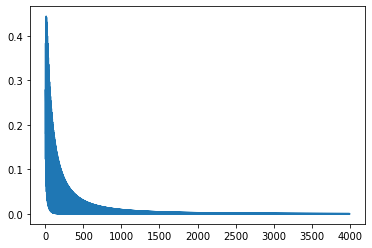

In [5]:
plt.plot(and_gate.loss);

In [6]:
test1, test2, test3, test4 = np.array([1, 1, 1]), np.array([1, 0, 1]), np.array([0, 1, 1]), np.array([0, 0, 1])
print(f"{test1} predicted {and_gate.predict(test1)[0]} expected 1")
print(f"{test2} {and_gate.predict(test2)[0]} expected 0")
print(f"{test3} {and_gate.predict(test3)[0]} expected 0")
print(f"{test4} {and_gate.predict(test4)[0]} expected 0")

[1 1 1] predicted 0.9726448516498023 expected 1
[1 0 1] 0.013615488621227082 expected 0
[0 1 1] 0.013746619960491948 expected 0
[0 0 1] 5.410991367994375e-06 expected 0


## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0


In [8]:
cols_to_norm = ['age','trestbps', 'chol', 'thalach']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [9]:
class TwoLayerNetSimple(object):
    """
    Simple two fully connected layers net with simple loss function loss = y - y_pred
    """
    def __init__(self, input_dim = 3, hidden_dim = 64, output_dim = 1, iterations=10000):
        self.iterations = iterations

        # initiailize weights
        self.W1 = np.random.rand(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros(hidden_dim)
        self.W2 = np.random.rand(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T).reshape(x.shape)
        dw = x.T.dot(dout)
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        
        for i in range(self.iterations):           
            # forward prop
            a1, cache_l1 = self.affine_forward(x, self.W1, self.b1)
            out_l1 = self.sigmoid(a1)
            a2, cache_l2 = self.affine_forward(out_l1, self.W2, self.b2)

            # scoring
            out_l2 = self.sigmoid(a2)
            loss = y.reshape(-1, 1) - out_l2#.reshape(-1,1) - out_l2
            self.loss.append(loss[0][0])

            # back prop
            da2 = loss * self.dsigmoid(out_l2)
            dout_l2, dW2, db2 = self.affine_backward(da2, cache_l2)
            da1 = dout_l2 * self.dsigmoid(out_l1)
            _, dW1, db1 = self.affine_backward(da1, cache_l1)

            # gradient update
            self.W1 += dW1
            self.b1 += db1
            self.W2 += dW2
            self.b2 += db2
        pass
        
    def predict(self, x):
        x = np.array(x)
        a1, _ = self.affine_forward(x, self.W1, self.b1)
        out1 = self.sigmoid(a1)
        scores = self.affine_forward(out1, self.W2, self.b2)
        out = self.sigmoid(scores[0])
        return out

In [10]:
nn = TwoLayerNetSimple(input_dim=13, hidden_dim=64, output_dim=1, iterations=100)
nn.fit(X_train, y_train)

c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


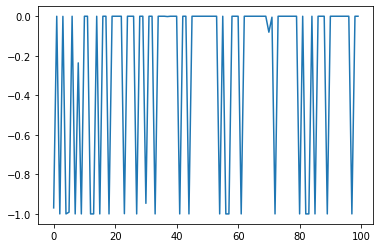

In [11]:
plt.plot(nn.loss);

In [12]:
y_pred = nn.predict(X_test)
y_pred = np.where(y_pred > 0.9, 1, 0)
print(f'accuracy is {accuracy_score(y_test, y_pred.reshape(-1,))}')

accuracy is 0.639344262295082


c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1


In [14]:
x = df.values 
min_max_scaler = StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled[:, :-1], x_scaled[:, -1], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


## 4.1 Baseline

In [15]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(inputs)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history = model.fit(X_train, y_train, validation_split=0.20, epochs=100, verbose=0)

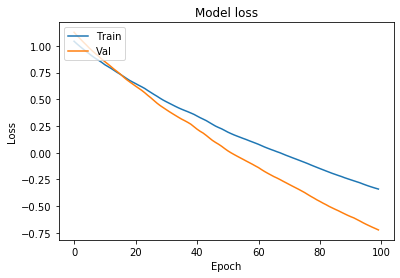

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show();

In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy is {scores[1]}")

Test accuracy is 0.0


## 4.2 GridSearch

### 4.2.1 Search for batch size and epochs

In [19]:
inputs = X_train.shape[1]

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'batch_size': [16, 32, 64],
              'epochs': [20, 80]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.842975224837784 using {'batch_size': 16, 'epochs': 20}
Means: 0.842975224837784, Stdev: 0.031844376592909354 with: {'batch_size': 16, 'epochs': 20}
Means: 0.8099173566034018, Stdev: 0.047271261493147934 with: {'batch_size': 16, 'epochs': 80}
Means: 0.8429752034096678, Stdev: 0.026233660386847046 with: {'batch_size': 32, 'epochs': 20}
Means: 0.8388429744677111, Stdev: 0.03551009045872644 with: {'batch_size': 32, 'epochs': 80}
Means: 0.8181818144873154, Stdev: 0.0364547306101228 with: {'batch_size': 64, 'epochs': 20}
Means: 0.8347107470035553, Stdev: 0.03167179233993921 with: {'batch_size': 64, 'epochs': 80}


In [20]:
print(f'{grid_result.best_params_} {grid_result.best_score_}')

{'batch_size': 16, 'epochs': 20} 0.842975224837784


### 4.2.2 STRETCH GOAL
Search for Weight Initialization, SGD momentum, SGD learning rate

In [21]:
def create_model2(init_mode='uniform', learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model2, epochs=80, batch_size=16, verbose=0)
# define the grid search parameters
init_mode = ['normal', 'he_normal']
learn_rate = [0.001, 0.01]
momentum = [0.0, 0.4]
param_grid = dict(init_mode=init_mode, learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


c:\users\han-chung lee\.virtualenvs\ds-unit-4-sprint-2-neural-networks-v4qq6gjw\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.838843 using {'init_mode': 'he_normal', 'learn_rate': 0.01, 'momentum': 0.4}
0.801653 (0.041541) with: {'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.0}
0.818182 (0.041960) with: {'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.4}
0.818182 (0.046570) with: {'init_mode': 'normal', 'learn_rate': 0.01, 'momentum': 0.0}
0.809917 (0.043300) with: {'init_mode': 'normal', 'learn_rate': 0.01, 'momentum': 0.4}
0.814050 (0.027499) with: {'init_mode': 'he_normal', 'learn_rate': 0.001, 'momentum': 0.0}
0.809917 (0.056360) with: {'init_mode': 'he_normal', 'learn_rate': 0.001, 'momentum': 0.4}
0.805785 (0.036515) with: {'init_mode': 'he_normal', 'learn_rate': 0.01, 'momentum': 0.0}
0.838843 (0.010145) with: {'init_mode': 'he_normal', 'learn_rate': 0.01, 'momentum': 0.4}


In [22]:
print(f'Best params from the search are {grid_result.best_params_} with best score of {grid_result.best_score_}')

Best params from the search are {'init_mode': 'he_normal', 'learn_rate': 0.01, 'momentum': 0.4} with best score of 0.8388429715121088


## 4.2.3 Combine all the search results together

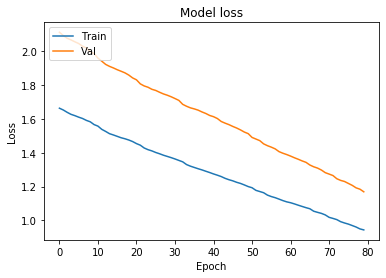

In [23]:
# init_mode = 'normal', learning_rate=0.001, momentum=0.0, batch_size=64, epochs=80

inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, kernel_initializer='normal',activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(inputs)

model_final = Model(inputs=inputs, outputs=predictions)
optimizer = SGD(lr=0.001, momentum=0)

model_final.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model_final.fit(X_train, y_train, validation_split=0.20, batch_size=64, epochs=80, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show();

In [24]:
scores_final = model_final.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy is {scores[1]}")

Test accuracy is 0.0
